<a href="https://colab.research.google.com/github/sumiyamoon05/TechBD/blob/main/output%20grade%20predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.model_selection import cross_val_score
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor # Importing Decision Tree Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler,StandardScaler,PolynomialFeatures ## for normalization of data
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,classification_report ## classification report
import seaborn as sns  ## data visualization
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
import warnings # supress warnings
warnings.filterwarnings('ignore')

In [80]:
from google.colab import files
uploaded = files.upload()

Saving DATA_adapted.csv to DATA_adapted (3).csv


In [81]:
data = pd.read_csv('DATA_adapted.csv')
data

,Student ID,1- Student Age,2- Sex,3- Graduated high-school type,4- Scholarship type,5- Additional work,6- Regular artistic or sports activity,7- Do you have a partner,8- Total salary,9- Transportation to the university,...,23- Preparation to midterm exams(1: alone 2: with friends 3: not applicable),24- Preparation to midterm exams(1: closest date to the exam 2: regularly during the semester 3: never),25- Taking notes in classes,26- Listening in classes,27- Discussion improves my interest and success in the course,28- Flip-classroom,29- Cumulative grade point average in the last semester,30- Expected Cumulative grade point average in the graduatio,Course ID,OUTPUT Grade
0,STUDENT1,2.0,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2.0,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2.0,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1.0,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,NaN,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2.0,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1.0,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,NaN,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2.0,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


## Data Exploration

In [82]:
data.info() ### data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                   --------------  -----  
 0   Student ID                                                                                               145 non-null    object 
 1   1- Student Age                                                                                           126 non-null    float64
 2   2- Sex                                                                                                   145 non-null    int64  
 3   3- Graduated high-school type                                                                            145 non-null    int64  
 4   4- Scholarship type                                                                   

In [83]:
data.isnull().sum()

Student ID                                                                                                  0
1- Student Age                                                                                             19
2- Sex                                                                                                      0
3- Graduated high-school type                                                                               0
4- Scholarship type                                                                                         0
5- Additional work                                                                                          0
6- Regular artistic or sports activity                                                                      0
7- Do you have a partner                                                                                    0
8- Total salary                                                                                             0
9- Transpo

In [84]:
data.describe() ### descriptive statistics

,1- Student Age,2- Sex,3- Graduated high-school type,4- Scholarship type,5- Additional work,6- Regular artistic or sports activity,7- Do you have a partner,8- Total salary,9- Transportation to the university,10- Accommodation type,...,23- Preparation to midterm exams(1: alone 2: with friends 3: not applicable),24- Preparation to midterm exams(1: closest date to the exam 2: regularly during the semester 3: never),25- Taking notes in classes,26- Listening in classes,27- Discussion improves my interest and success in the course,28- Flip-classroom,29- Cumulative grade point average in the last semester,30- Expected Cumulative grade point average in the graduatio,Course ID,OUTPUT Grade
count,126.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,...,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,1.611111,1.600000,1.944828,3.572414,1.662069,1.600000,1.579310,1.627586,1.620690,1.731034,...,1.337931,1.165517,2.544828,2.055172,2.393103,1.806897,3.124138,2.724138,4.131034,3.227586
std,0.606264,0.491596,0.537216,0.805750,0.474644,0.491596,0.495381,1.020245,1.061112,0.783999,...,0.614870,0.408483,0.564940,0.674736,0.604343,0.810492,1.301083,0.916536,3.260145,2.197678
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000
75%,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,7.000000,5.000000
max,3.000000,2.000000,3.000000,5.000000,2.000000,2.000000,2.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,4.000000,9.000000,7.000000


In [85]:
# Calculate the mode of the '1- Student Age' column
age_mode = data['1- Student Age'].mode()[0]

# Fill missing values in the '1- Student Age' column with the mode
data['1- Student Age'].fillna(age_mode, inplace=True)
data

,Student ID,1- Student Age,2- Sex,3- Graduated high-school type,4- Scholarship type,5- Additional work,6- Regular artistic or sports activity,7- Do you have a partner,8- Total salary,9- Transportation to the university,...,23- Preparation to midterm exams(1: alone 2: with friends 3: not applicable),24- Preparation to midterm exams(1: closest date to the exam 2: regularly during the semester 3: never),25- Taking notes in classes,26- Listening in classes,27- Discussion improves my interest and success in the course,28- Flip-classroom,29- Cumulative grade point average in the last semester,30- Expected Cumulative grade point average in the graduatio,Course ID,OUTPUT Grade
0,STUDENT1,2.0,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2.0,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2.0,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1.0,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2.0,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2.0,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1.0,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,2.0,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2.0,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


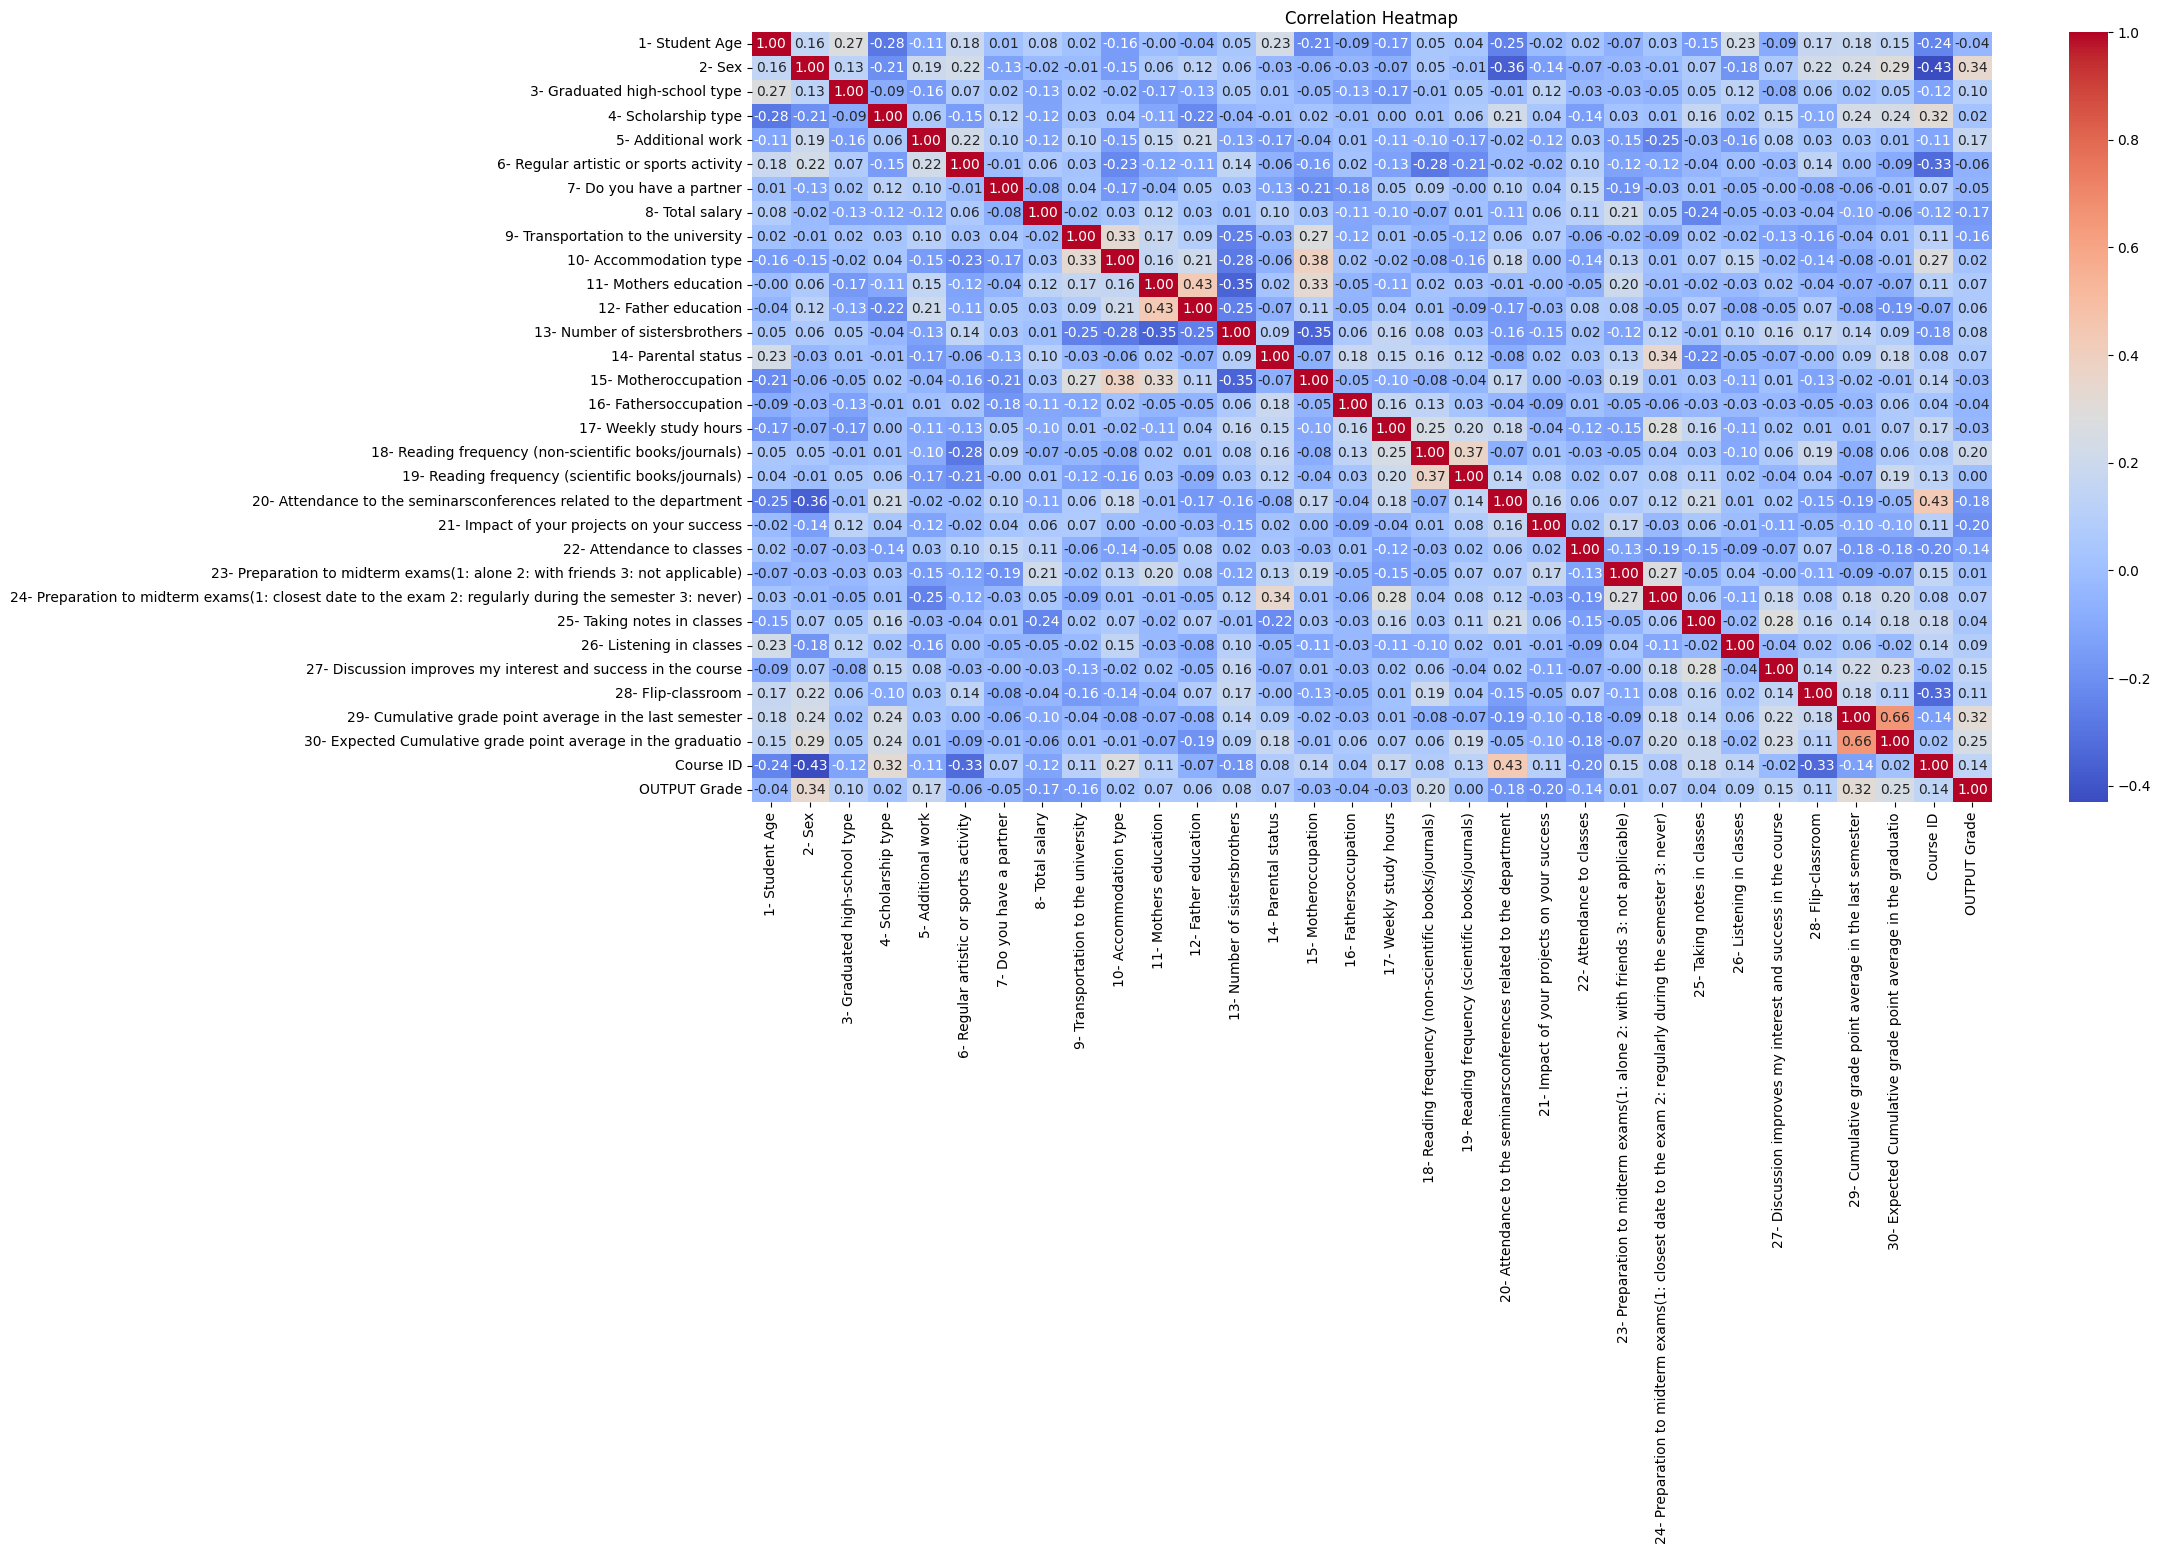

In [86]:
# Assuming 'data' is your DataFrame
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Correlation heatmap for numeric columns
plt.figure(figsize=(20, 10))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

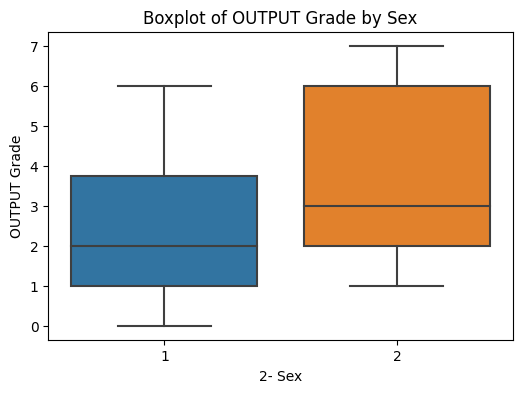

In [87]:
# Boxplot for 'OUTPUT Grade' with respect to '2- Sex'
plt.figure(figsize=(6, 4))
sns.boxplot(x='2- Sex', y='OUTPUT Grade', data=data)
plt.title('Boxplot of OUTPUT Grade by Sex')
plt.show()

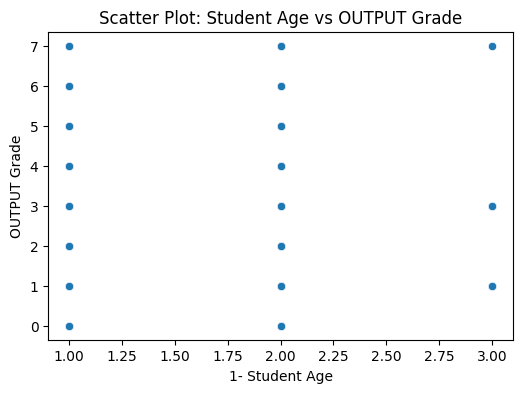

In [88]:
# Scatter plot between '1- Student Age' and 'OUTPUT Grade'
plt.figure(figsize=(6, 4))
sns.scatterplot(x='1- Student Age', y='OUTPUT Grade', data=data)
plt.title('Scatter Plot: Student Age vs OUTPUT Grade')
plt.show()

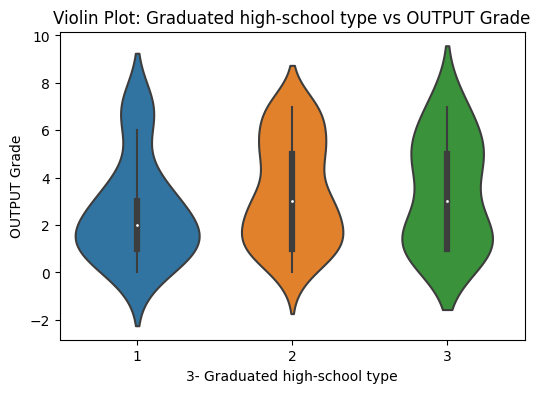

In [89]:
# Violin plot for '3- Graduated high-school type' and 'OUTPUT Grade'
plt.figure(figsize=(6,4))
sns.violinplot(x='3- Graduated high-school type', y='OUTPUT Grade', data=data)
plt.title('Violin Plot: Graduated high-school type vs OUTPUT Grade')
plt.show()

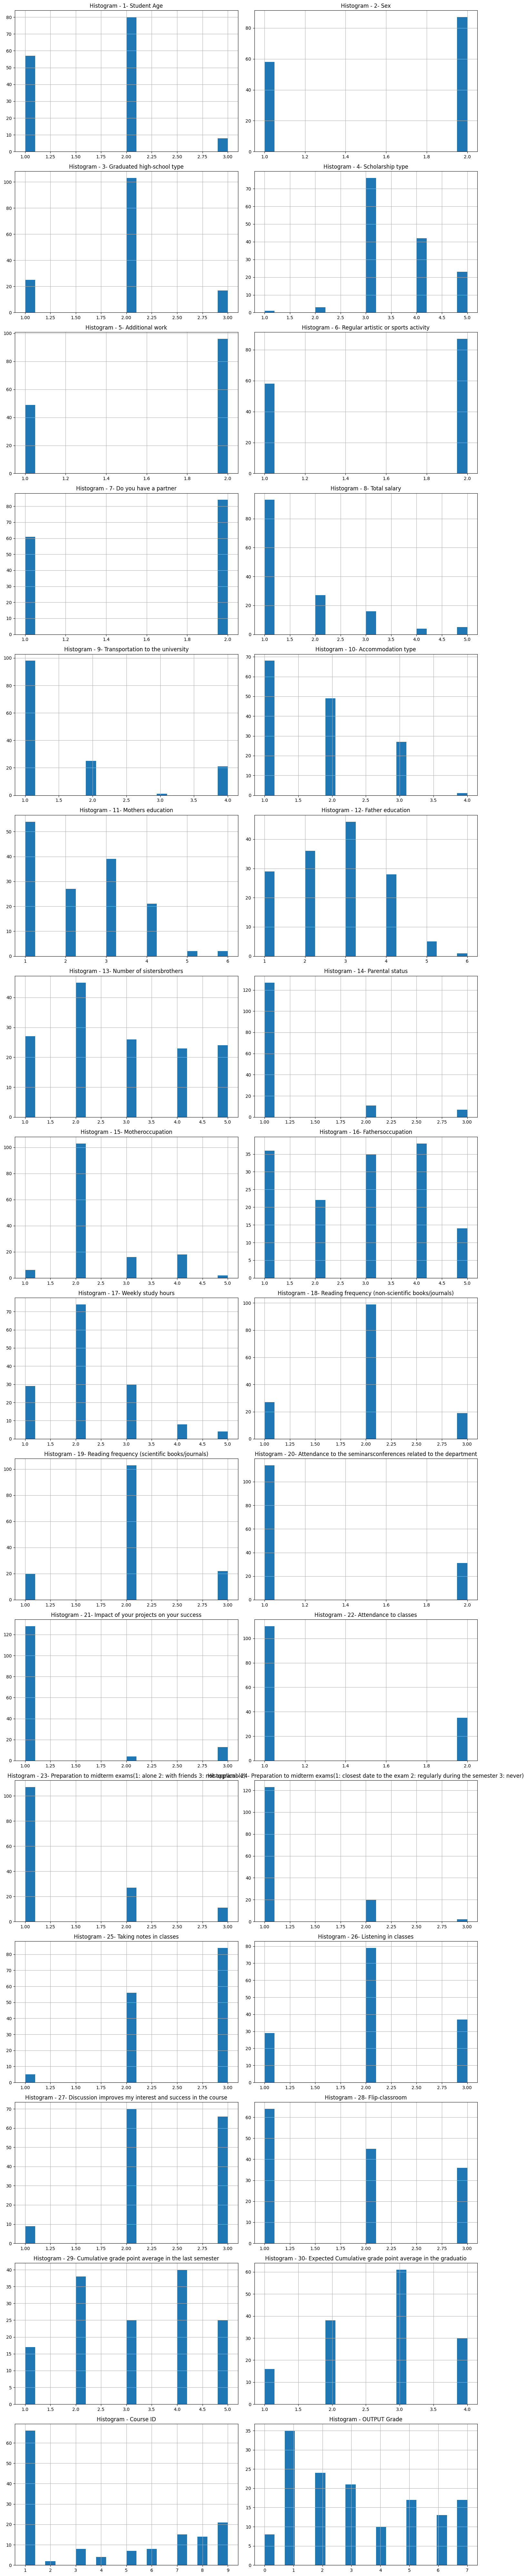

In [91]:
import matplotlib.pyplot as plt

# Visualize the distribution of numeric columns using histograms
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Determine the number of rows and columns for the subplot grid
num_cols = 2
num_rows = (len(numeric_columns) + 1) // num_cols

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through numeric columns and plot histograms
for i, column in enumerate(numeric_columns):
    data[column].hist(ax=axes[i], bins=20)
    axes[i].set_title(f'Histogram - {column}')

# Adjust layout
plt.tight_layout()
plt.show()

## Data Preprocessing

In [92]:
# Assuming df is my DataFrame
# Columns 23 and 24 represent preparation methods for midterm exams
preparation_columns = ['23- Preparation to midterm exams(1: alone 2: with friends 3: not applicable)',
                        '24- Preparation to midterm exams(1: closest date to the exam 2: regularly during the semester 3: never)']

# Convert the values to numeric, replacing 'not applicable' with NaN
data[preparation_columns] = data[preparation_columns].apply(pd.to_numeric, errors='coerce')

# Create a new feature 'Average Preparation Method'
data['Average Preparation Method'] = data[preparation_columns].mean(axis=1)


In [110]:
# Example: One-hot encoding for a categorical column
df_encoded = pd.get_dummies(data, columns=['3- Graduated high-school type','Student ID'], drop_first=True)
df_encoded

,1- Student Age,2- Sex,4- Scholarship type,5- Additional work,6- Regular artistic or sports activity,7- Do you have a partner,8- Total salary,9- Transportation to the university,10- Accommodation type,11- Mothers education,...,Student ID_STUDENT90,Student ID_STUDENT91,Student ID_STUDENT92,Student ID_STUDENT93,Student ID_STUDENT94,Student ID_STUDENT95,Student ID_STUDENT96,Student ID_STUDENT97,Student ID_STUDENT98,Student ID_STUDENT99
0,2.0,2,3,1,2,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2.0,2,3,1,2,2,1,1,1,2,...,0,0,0,0,0,0,0,0,0,0
2,2.0,2,3,2,2,2,2,4,2,2,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1,3,1,2,1,2,1,2,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2,3,2,2,1,3,1,4,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2.0,1,3,1,1,2,1,1,2,1,...,0,0,0,0,0,0,0,0,0,0
141,1.0,1,4,2,2,2,1,4,2,1,...,0,0,0,0,0,0,0,0,0,0
142,2.0,1,4,2,2,2,1,1,1,3,...,0,0,0,0,0,0,0,0,0,0
143,2.0,1,4,1,1,1,5,2,3,4,...,0,0,0,0,0,0,0,0,0,0


### Categorical variables can be one-hot encoded using pandas' pd.get_dummies() method. To prepare categorical variables for machine learning methods, one-hot encoding transforms them into binary vectors (0s and 1s).

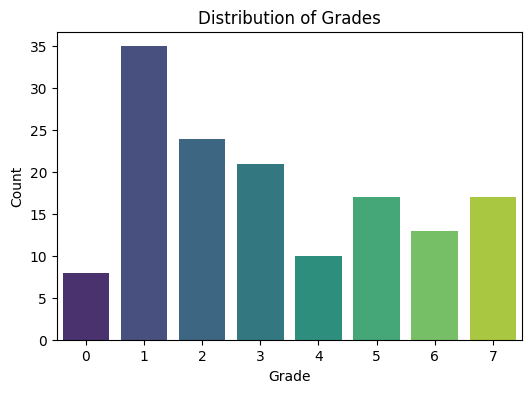

In [111]:
# Count the occurrences of each grade
grade_counts = data['OUTPUT Grade'].value_counts()

# Sort the grades in ascending order
grades = sorted(grade_counts.index)

# Plot the bar plot
plt.figure(figsize=(6,4))
sns.countplot(x='OUTPUT Grade', data=data, order=grades, palette='viridis')

# Add labels and title
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Distribution of Grades')

# Show the plot
plt.show()

In [112]:
# Example: Remove outliers using z-score
from scipy.stats import zscore

z_scores = zscore(data['1- Student Age'])
df_no_outliers = data[(z_scores < 3) & (z_scores > -3)]

In [113]:
# to extract the independent variables
X = df_encoded.drop(columns=['OUTPUT Grade'])

# to extract the dependent variable
y = df_encoded['OUTPUT Grade']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=25)
cv = KFold(n_splits=7, random_state=25, shuffle=True)

In [115]:
from sklearn.preprocessing import StandardScaler, Normalizer, LabelEncoder
# scaling the data is required so that the value comes on range of 0 to 1
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
# Replace RandomForestClassifier with your actual classifier
classifier_without_scaling = RandomForestClassifier(random_state=25)

# Without Scaling
scores_without_scaling = cross_val_score(classifier_without_scaling, X_train, y_train, cv=cv, scoring='accuracy')
print(f'Accuracy without scaling: {scores_without_scaling.mean()}')

# With Scaling
classifier_with_scaling = RandomForestClassifier(random_state=25)
pipeline = Pipeline([('scaler', StandardScaler()), ('classifier', classifier_with_scaling)])
scores_with_scaling = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')
print(f'Accuracy with scaling: {scores_with_scaling.mean()}')

Accuracy without scaling: 0.19404761904761902
Accuracy with scaling: 0.1851190476190476


In [100]:
# The results of the random search will be used to create the parameter grid.
params_dt_alternative = {'max_depth': [3, 5, 7, 10],
                         'min_samples_split': [2, 5, 10],
                         'min_samples_leaf': [1, 3, 5],
                         'random_state': [42]
                        }

# Grid search model with alternative hyperparameters
grid_search_dt_alternative = GridSearchCV(estimator=DecisionTreeClassifier(),
                                          param_grid=params_dt_alternative,
                                          cv=cv, n_jobs=-1, verbose=1, scoring="accuracy")

grid_search_dt_alternative.fit(X_train, y_train)
print("The best parameters are : ", grid_search_dt_alternative.best_estimator_)
print("Cross-validated best score {}%".format(round(grid_search_dt_alternative.best_score_ * 100, 3)))

# Construct a Decision Tree classifier object with a customized hyper-parameter for the best precision.
clf_dt_alternative = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=42)
clf_dt_alternative.fit(X_train, y_train)
y_pred_dt_alternative = clf_dt_alternative.predict(X_test)

print("Accuracy of the Decision Tree Model on test data:", metrics.accuracy_score(y_test, y_pred_dt_alternative))

# Create the Confusion Matrix
print('Confusion Matrix ', confusion_matrix(y_test, y_pred_dt_alternative))
print(classification_report(y_test, y_pred_dt_alternative))

# Use K-fold cross-validation to assess the Decision Tree Classifier Model.
scores_alternative = cross_val_score(clf_dt_alternative, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

# Report the performance of DT
print('Accuracy of the Decision Tree Model using K-fold cross-validation: %.3f (%.3f)' % (np.mean(scores_alternative), np.std(scores_alternative)))


Fitting 7 folds for each of 36 candidates, totalling 252 fits
The best parameters are :  DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=10,
                       random_state=42)
Cross-validated best score 23.393%
Accuracy of the Decision Tree Model on test data: 0.1891891891891892
Confusion Matrix  [[ 2  0  0  0 12  0  0]
 [ 1  0  0  0  4  0  0]
 [ 1  0  0  0  7  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  5  0  0]
 [ 0  0  0  0  1  0  0]
 [ 1  0  0  0  2  0  0]]
              precision    recall  f1-score   support

           1       0.40      0.14      0.21        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         1
           5       0.16      1.00      0.27         5
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         3

    accuracy                           0.19        37
   macro avg  

In [101]:
# Create the parameter grid based on different hyperparameters
params_lr_alternative = {'solver': ['liblinear', 'sag', 'saga'],
                         'penalty': ['l1', 'l2'],
                         'C': [1, 5, 10],
                         'random_state': [42]
                        }

# Grid search model with alternative hyperparameters
grid_search_lr_alternative = GridSearchCV(estimator=LogisticRegression(),
                                          param_grid=params_lr_alternative,
                                          cv=cv, n_jobs=-1, verbose=1, scoring="accuracy")

grid_search_lr_alternative.fit(X_train, y_train)

print("The best parameters are : ", grid_search_lr_alternative.best_estimator_)
print("Cross-validated best score {}%".format(round(grid_search_lr_alternative.best_score_ * 100, 3)))

# Model construction based on customised hyperparameters
clf_lr_alternative = LogisticRegression(C=1, random_state=42, solver='liblinear', penalty='l2')
clf_lr_alternative.fit(X_train, y_train)
y_pred_lr_alternative = clf_lr_alternative.predict(X_test)

print("Accuracy of the Logistic Regression Model on test data:", metrics.accuracy_score(y_test, y_pred_lr_alternative))

# Create the Confusion Matrix
print('Confusion Matrix ', confusion_matrix(y_test, y_pred_lr_alternative))
print(classification_report(y_test, y_pred_lr_alternative))

# Evaluate the Logistic Regression Model using K-fold cross-validation
log_scores_alternative = cross_val_score(clf_lr_alternative, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

# Report performance of LR
print('Accuracy of the Logistic Regression Model using K-fold cross-validation is : %.3f (%.3f)' % (np.mean(log_scores_alternative), np.std(log_scores_alternative)))

Fitting 7 folds for each of 18 candidates, totalling 126 fits
The best parameters are :  LogisticRegression(C=10, penalty='l1', random_state=42, solver='saga')
Cross-validated best score 21.429%
Accuracy of the Logistic Regression Model on test data: 0.1891891891891892
Confusion Matrix  [[0 0 7 0 0 0 7]
 [0 0 1 0 0 0 4]
 [0 0 4 0 0 0 4]
 [0 0 1 0 0 0 0]
 [0 0 4 0 0 0 1]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 0 3]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         5
           3       0.24      0.50      0.32         8
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         1
           7       0.15      1.00      0.26         3

    accuracy                           0.19        37
   macro avg       0.06      0.21      0.08        37
weighted avg       0.06      0.19      0.09       

In [102]:
from sklearn.ensemble import RandomForestClassifier


# Create the parameter grid based on different hyperparameters
params_rf = {'n_estimators': [50, 100, 150],
             'max_depth': [None, 10, 20],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4],
             'random_state': [42]
            }

# Grid search model with alternative hyperparameters
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(),
                              param_grid=params_rf,
                              cv=cv, n_jobs=-1, verbose=1, scoring="accuracy")

grid_search_rf.fit(X_train, y_train)

print("The best parameters are : ", grid_search_rf.best_estimator_)
print("Cross-validated best score {}%".format(round(grid_search_rf.best_score_ * 100, 3)))

# Model construction based on customised hyperparameters
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)

print("Accuracy of the Random Forest Model on test data:", metrics.accuracy_score(y_test, y_pred_rf))

# Create the Confusion Matrix
print('Confusion Matrix ', confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Evaluate the Random Forest Model using K-fold cross-validation
rf_scores = cross_val_score(clf_rf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

# Report performance of RF
print('Accuracy of the Random Forest Model using K-fold cross-validation is : %.3f (%.3f)' % (np.mean(rf_scores), np.std(rf_scores)))


Fitting 7 folds for each of 81 candidates, totalling 567 fits
The best parameters are :  RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=50,
                       random_state=42)
Cross-validated best score 20.417%
Accuracy of the Random Forest Model on test data: 0.21621621621621623
Confusion Matrix  [[ 0  0 14  0  0  0  0]
 [ 0  0  5  0  0  0  0]
 [ 0  0  8  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  5  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  3  0  0  0  0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         5
           3       0.22      1.00      0.36         8
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         3

    accuracy                           0.22        37
   macro avg   

## FEATURE ENGINEERING

In [103]:
from sklearn.ensemble import RandomForestClassifier

# Assuming X and y are your features and target variable
X = data.drop(['Student ID', 'Course ID', 'OUTPUT Grade', 'Average Preparation Method'], axis=1)
y = data['OUTPUT Grade']

# Fit a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to visualize feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(feature_importance_df)


                                              Feature  Importance
28  29- Cumulative grade point average in the last...    0.071004
15                              16- Fathersoccupation    0.053562
12                      13- Number of sistersbrothers    0.052885
10                              11- Mothers education    0.052218
11                               12- Father education    0.048171
16                             17- Weekly study hours    0.044118
29  30- Expected Cumulative grade point average in...    0.043170
3                                 4- Scholarship type    0.040248
7                                     8- Total salary    0.038159
27                                 28- Flip-classroom    0.037408
9                              10- Accommodation type    0.037242
25                           26- Listening in classes    0.037097
18  19- Reading frequency (scientific books/journals)    0.034021
17  18- Reading frequency (non-scientific books/jo...    0.032501
0         

### The contribution of each feature to producing precise predictions is measured by feature significance. A more significant part in the model's decision-making process is indicated by higher values.
29- The last semester's cumulative grade point average (CGPA_last_semester): The greatest priority feature (0.071004) indicates that this factor is very important for predicting the target variable.

16-The occupation of dads: This is the second most significant feature (0.053562), suggesting that fathers' occupations significantly affect the model's output.

The feature "Number of sisters/brothers" (0.052885) holds significant importance as well, indicating that the model's predictions are influenced by the number of siblings.

11- moms' education: Another important factor is the moms' education level (0.052218).

### Decision Tree Model:
Reliability: 19%
All classes have low precision, but classes 1 and 2 especially so.
Class 3 and 7 recall is comparatively greater than the others, yet it is still low.
Class 7 has the greatest F1-score, which suggests a stronger recall and accuracy ratio.

### Logistic Regression
Precision: 8%
With the exception of class 7, all classes have low precision.
memory: Class 7 has a memory score of 1.0, whereas other classes often have poor recall scores.
Overall low F1-score, suggesting an unsatisfactory recall and accuracy ratio.

### RANDOM FOREST METHOD
PRECISION: The precision for classes 1 through 6 is zero, meaning that no instances for these classes were properly predicted by the model.
For class 7, the precision is 0.08, which indicates that 8% of the cases that were predicted were accurate.
RECALL: The fact that the recall for classes 1 through 6 is zero indicates that no examples from these classes were picked up by the model.
Class 7 recall is 1.0, indicating that every instance of class 7 was accurately recognised by the model.
F1 Score: Class 1 through class 6 have an F1-score of 0, meaning that their accuracy and recall are also zero.
Class 7's F1-score of 0.15 suggests that recall and accuracy are somewhat balanced in this class.
Thus accuracy of all models is found out with the help of cross validation and here k folds validation is used with value as 7. Random Forest Method perform best with an accuracy of 21 percent in comparison to all models
